In [40]:
!pip install pandas matplotlib seaborn openpyxl


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Charger le fichier Excel
df = pd.read_excel("Capital.xls")  # Assure-toi que le fichier est bien dans le même dossier que le notebook

# Afficher les premières lignes
df.head()


,X,Y,Z
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


In [43]:
!pip install xlrd


In [44]:
#Qst1:
# Charger le fichier Excel
df = pd.read_excel("Capital.xls")  # Assure-toi que le fichier est bien dans le même dossier que le notebook

# Afficher les premières lignes
df.head()

,X,Y,Z
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


/tmp/ipykernel_25204/4052362551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


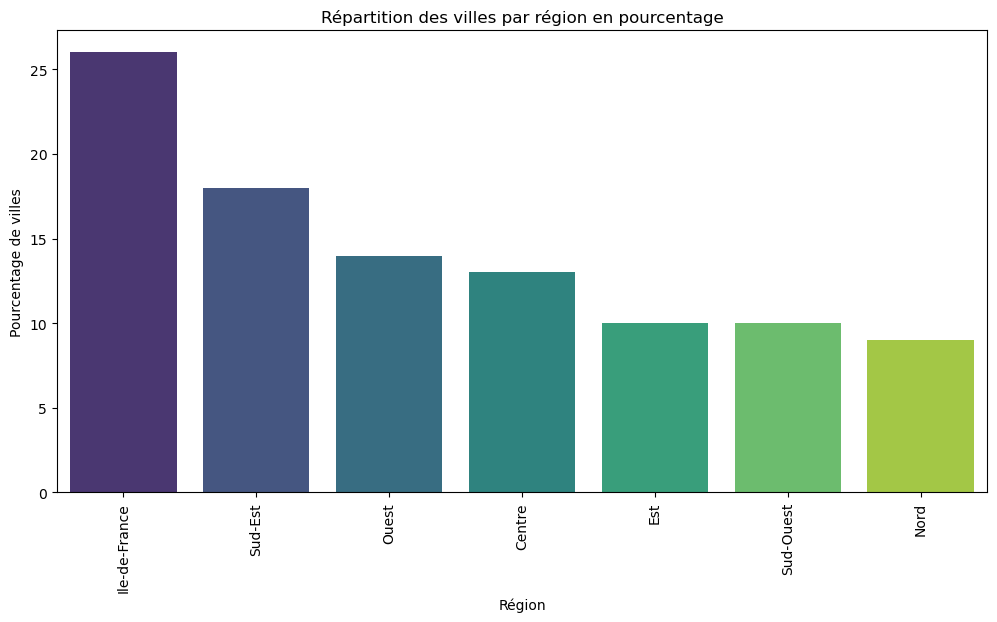

In [47]:
#Qst2: La répartition des villes par région en pourcentage
region_counts = df["Z"].value_counts(normalize=True) * 100

# Tracer l'histogramme
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Région")
plt.ylabel("Pourcentage de villes")
plt.title("Répartition des villes par région en pourcentage")
plt.show()

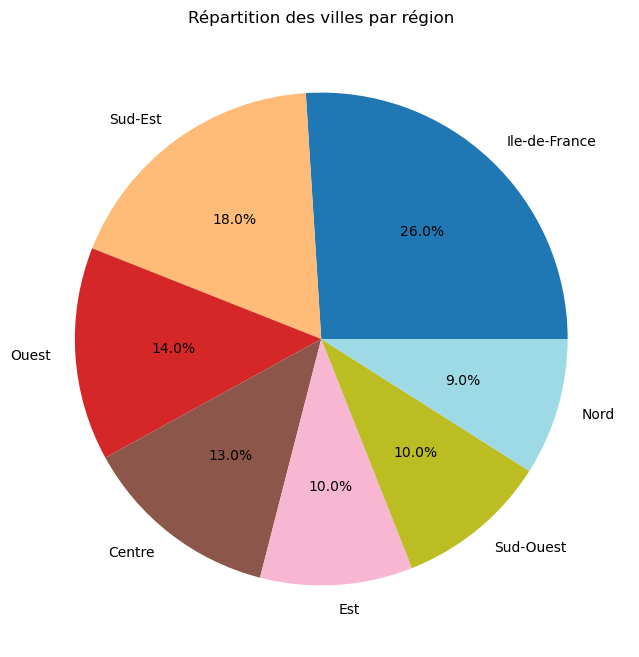

In [48]:
#Qst3:
#Représentation camembert de la répartition des villes par région
plt.figure(figsize=(8, 8))
df["Z"].value_counts().plot(kind="pie", autopct="%1.1f%%", colormap="tab20")
plt.title("Répartition des villes par région")
plt.ylabel("")  # Enlever le label inutile
plt.show()


/tmp/ipykernel_25204/2866001982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Z", y="Y", data=df, palette="Set3")


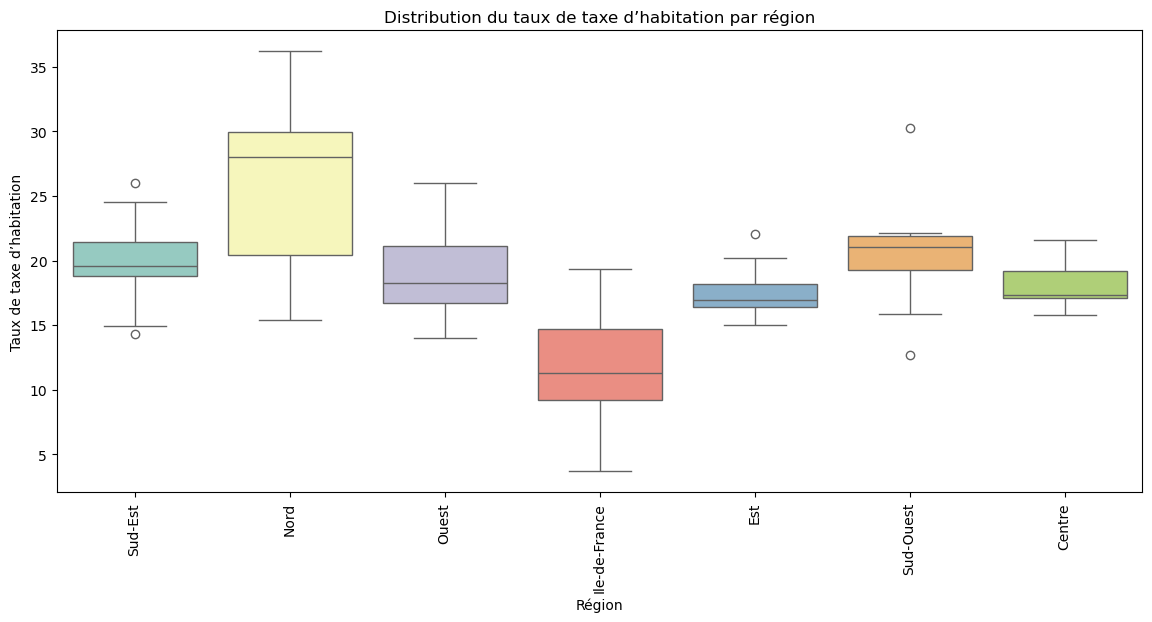

In [49]:
#Qst3:
#Représentation boxplot de la distribution du taux de la taxe d'habitation par région
plt.figure(figsize=(14, 6))
sns.boxplot(x="Z", y="Y", data=df, palette="Set3")
plt.xticks(rotation=90)
plt.xlabel("Région")
plt.ylabel("Taux de taxe d’habitation")
plt.title("Distribution du taux de taxe d’habitation par région")
plt.show()


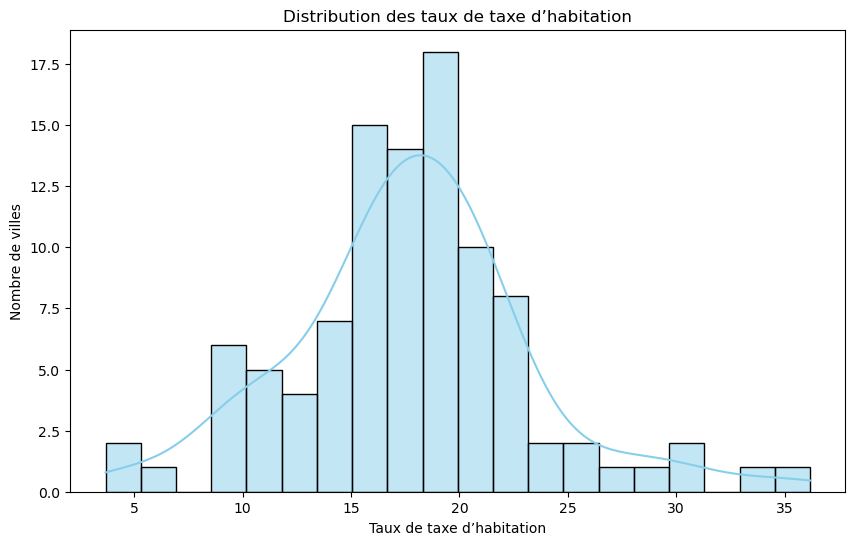

In [50]:
#Qst3:
#Distribution des taux de taxe d'habitation sous forme d'histplot
plt.figure(figsize=(10, 6))
sns.histplot(df["Y"], bins=20, kde=True, color="skyblue")
plt.xlabel("Taux de taxe d’habitation")
plt.ylabel("Nombre de villes")
plt.title("Distribution des taux de taxe d’habitation")
plt.show()


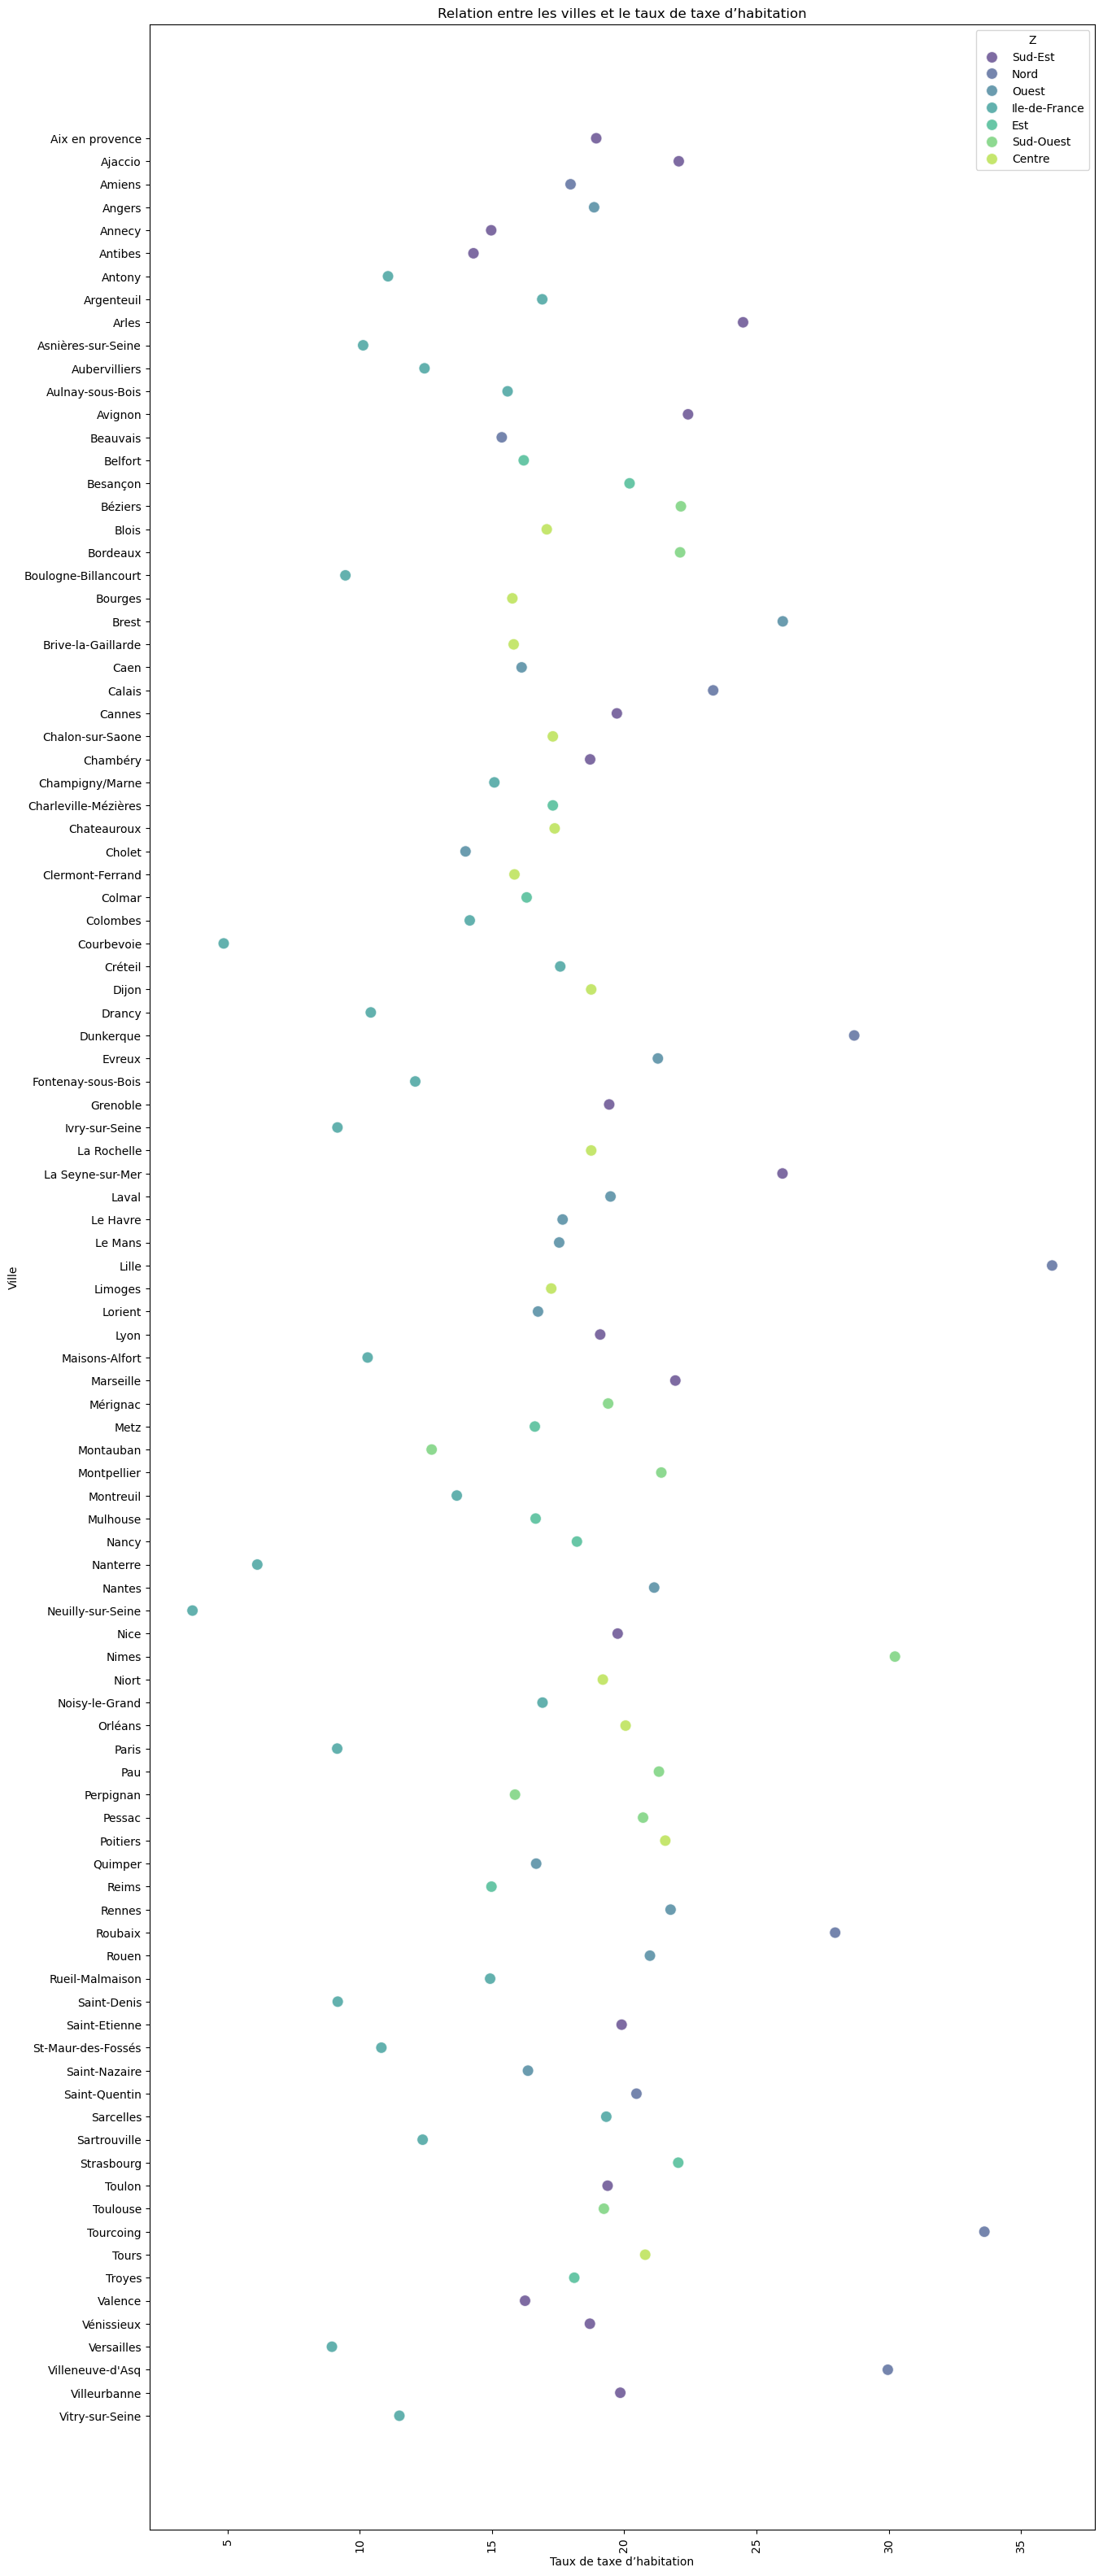

In [51]:
#Qst3:
# Scatter plot pour voir la relation entre X (taux de taxe d'habitation) et Y (une autre variable)
plt.figure(figsize=(15, 40))
sns.scatterplot(x="Y", y="X", data=df, hue="Z", palette="viridis", s=100, alpha=0.7)
plt.ylabel("Ville")
plt.xlabel("Taux de taxe d’habitation")
plt.title("Relation entre les villes et le taux de taxe d’habitation")
plt.xticks(rotation=90)
plt.show()



In [52]:
#Qst4: La région la plus représentée de cette étude
region_plus_rep = df["Z"].value_counts().idxmax()
print(f"La région la plus représentée est : {region_plus_rep}")


La région la plus représentée est : Ile-de-France


In [11]:
#Qst5:
# Statistiques globales
print(df["Y"].describe())

# Statistiques par région
df.groupby("Z")["Y"].describe()


count    100.000000
mean      17.770700
std        5.529599
min        3.680000
25%       15.062500
50%       17.625000
75%       20.522500
max       36.170000
Name: Y, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Z,,,,,,,,
Centre,13.0,18.115385,1.906881,15.77,17.0700,17.370,19.1900,21.55
Est,10.0,17.662000,2.095200,14.98,16.3875,16.975,18.1850,22.04
Ile-de-France,26.0,11.764615,3.879327,3.68,9.2425,11.285,14.7375,19.32
Nord,9.0,25.951111,7.099798,15.37,20.4600,27.970,29.9600,36.17
Ouest,14.0,18.896429,3.098314,14.00,16.6875,18.265,21.0900,25.99
Sud-Est,18.0,19.769444,2.938534,14.30,18.7675,19.575,21.4225,25.98
Sud-Ouest,10.0,20.511000,4.549406,12.72,19.2700,21.010,21.9325,30.23


In [12]:
#Qst6: La région la plus intéressante pour le taux de la taxe d'habitation
region_min_taxe = df.groupby("Z")["Y"].mean().idxmin()
print(f"La région avec la taxe d’habitation la plus basse est : {region_min_taxe}")


La région avec la taxe d’habitation la plus basse est : Ile-de-France


In [13]:
#Qst7: La région la plus représentative de la moyenne nationale
moyenne_nationale = df["Y"].mean()
region_proche_moyenne = (df.groupby("Z")["Y"].mean() - moyenne_nationale).abs().idxmin()
print(f"La région la plus proche de la moyenne nationale est : {region_proche_moyenne}")


La région la plus proche de la moyenne nationale est : Est


In [25]:
#Qst8: typologie des villes françaises en 3 groupes
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Appliquer K-means pour segmenter en 3 groupes
kmeans = KMeans(n_clusters=3, random_state=42)
df['Groupes'] = kmeans.fit_predict(df[['Y']])  # 'Y' est le taux de taxe d'habitation

# Vérifier les groupes créés
print(df[['X', 'Y', 'Groupes']].head())


                 X      Y  Groupes
0  Aix en provence  18.94        0
1          Ajaccio  22.06        0
2           Amiens  17.97        0
3           Angers  18.86        0
4           Annecy  14.97        0


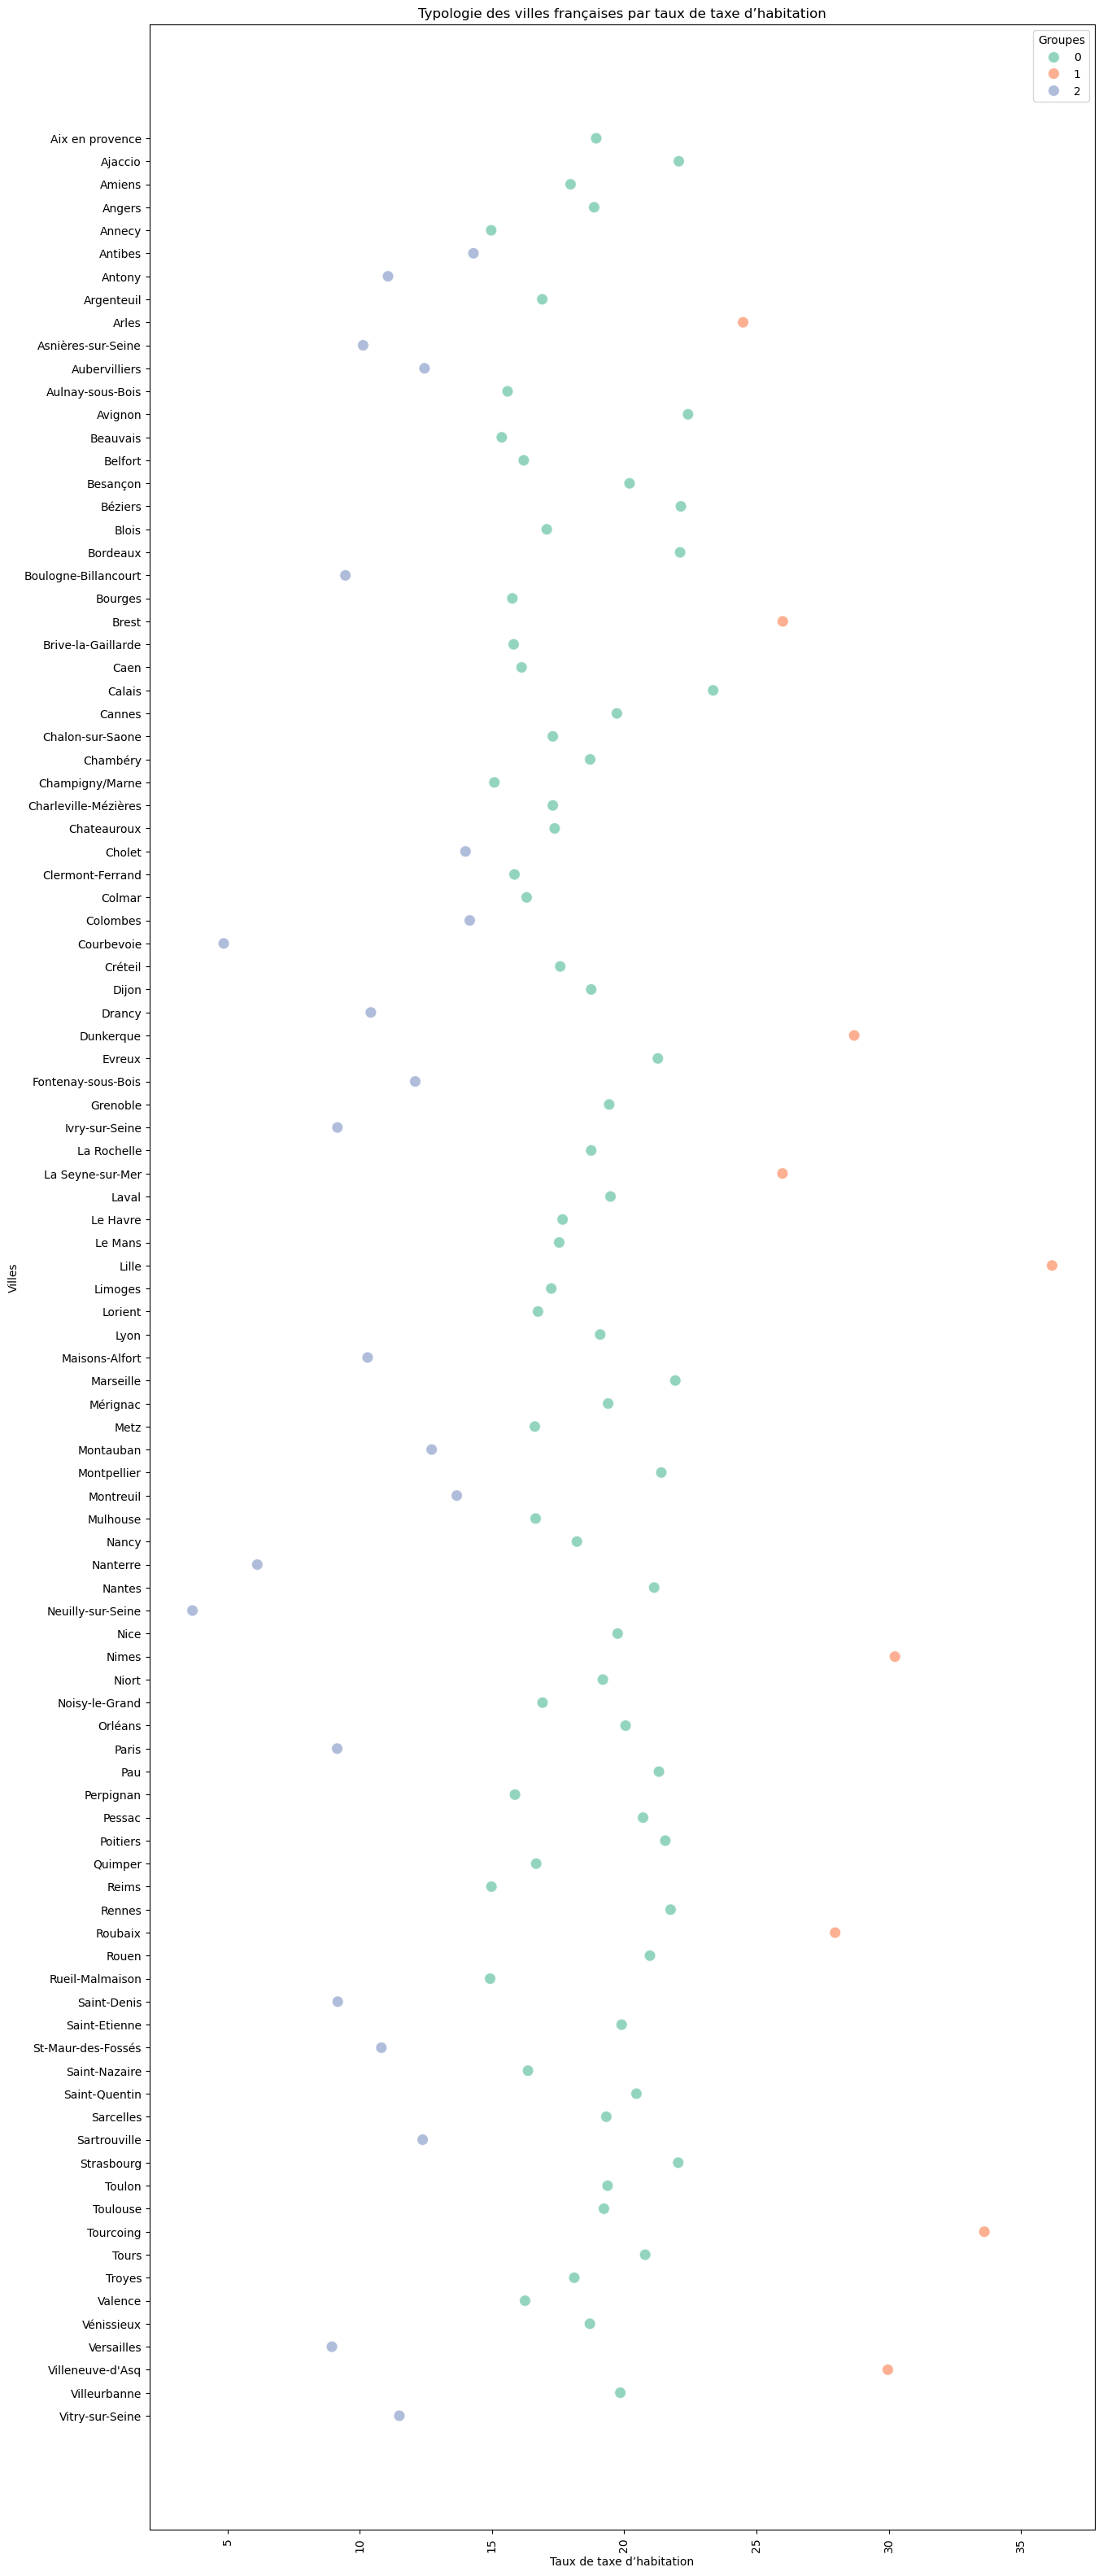

In [39]:
# Visualiser les groupes créés avec un scatter plot
plt.figure(figsize=(15, 40))
sns.scatterplot(x="Y", y="X", data=df, hue="Groupes", palette="Set2", s=100, alpha=0.7)
plt.ylabel("Villes")
plt.xlabel("Taux de taxe d’habitation")
plt.title("Typologie des villes françaises par taux de taxe d’habitation")
plt.xticks(rotation=90)
plt.legend(title="Groupes")
plt.show()


In [15]:
#Qst9: les villes avec un taux de taxe 30% au dessus et en dessous de la moyenne
def villes_ecart(marge):
    moyenne = df["Y"].mean()
    borne_basse = moyenne * (1 - marge)
    borne_haute = moyenne * (1 + marge)
    return df[(df["Y"] < borne_basse) | (df["Y"] > borne_haute)][["X", "Y"]]

print("Villes avec un taux 30% au-dessus ou en dessous de la moyenne :")
print(villes_ecart(0.30))


Villes avec un taux 30% au-dessus ou en dessous de la moyenne :
                       X      Y
6                 Antony  11.07
8                  Arles  24.49
9     Asnières-sur-Seine  10.13
19  Boulogne-Billancourt   9.46
21                 Brest  25.99
24                Calais  23.36
35            Courbevoie   4.86
38                Drancy  10.42
39             Dunkerque  28.69
41    Fontenay-sous-Bois  12.10
43        Ivry-sur-Seine   9.16
45      La Seyne-sur-Mer  25.98
49                 Lille  36.17
53        Maisons-Alfort  10.30
62              Nanterre   6.13
64     Neuilly-sur-Seine   3.68
66                 Nimes  30.23
70                 Paris   9.15
78               Roubaix  27.97
81           Saint-Denis   9.17
83    St-Maur-des-Fossés  10.82
87          Sartrouville  12.38
91             Tourcoing  33.61
96            Versailles   8.95
97      Villeneuve-d'Asq  29.96
99       Vitry-sur-Seine  11.50


In [16]:
#Qst10: les villes avec un taux de taxe 20% au dessus et en dessous de la moyenne
print("Villes avec un taux 20% au-dessus ou en dessous de la moyenne :")
print(villes_ecart(0.20))


Villes avec un taux 20% au-dessus ou en dessous de la moyenne :
                       X      Y
1                Ajaccio  22.06
6                 Antony  11.07
8                  Arles  24.49
9     Asnières-sur-Seine  10.13
10         Aubervilliers  12.45
12               Avignon  22.41
16               Béziers  22.14
18              Bordeaux  22.11
19  Boulogne-Billancourt   9.46
21                 Brest  25.99
24                Calais  23.36
31                Cholet  14.00
34              Colombes  14.16
35            Courbevoie   4.86
38                Drancy  10.42
39             Dunkerque  28.69
41    Fontenay-sous-Bois  12.10
43        Ivry-sur-Seine   9.16
45      La Seyne-sur-Mer  25.98
49                 Lille  36.17
53        Maisons-Alfort  10.30
54             Marseille  21.93
57             Montauban  12.72
58           Montpellier  21.40
59             Montreuil  13.67
62              Nanterre   6.13
64     Neuilly-sur-Seine   3.68
66                 Nimes  30.23
70      